In [1]:
# import wave  
# import numpy as np
# import matplotlib.pyplot as plt
# #打开wav文件 ，open返回一个的是一个Wave_read类的实例，通过调用它的方法读取WAV文件的格式和数据。
# f = wave.open(r"F:\Jupyter Projects\ANC\Data\PP_Ref.wav","rb")
# #读取格式信息  
# #一次性返回所有的WAV文件的格式信息，它返回的是一个组元(tuple)：声道数, 量化位数（byte单位）, 采  
# #样频率, 采样点数, 压缩类型, 压缩类型的描述。wave模块只支持非压缩的数据，因此可以忽略最后两个信息
# params = f.getparams()  
# nchannels, sampwidth, framerate, nframes = params[:4]
# #读取波形数据  
# #读取声音数据，传递一个参数指定需要读取的长度（以取样点为单位）  
# str_data  = f.readframes(nframes)  
# f.close()
# #将波形数据转换成数组
# #需要根据声道数和量化单位，将读取的二进制数据转换为一个可以计算的数组  
# wave_data = np.fromstring(str_data,dtype = np.short)
# #将wave_data数组改为2列，行数自动匹配。在修改shape的属性时，需使得数组的总长度不变。
# wave_data.shape = -1,2
# #转置数据
# wave_data = wave_data.T
# #通过取样点数和取样频率计算出每个取样的时间。
# time=np.arange(0,nframes)/framerate
# #print(params)  
# plt.figure(1) 
# plt.subplot(2,1,1)  
# #time 也是一个数组，与wave_data[0]或wave_data[1]配对形成系列点坐标
# plt.plot(time[:len(wave_data[0])],wave_data[0])  
# plt.subplot(2,1,2)  
# plt.plot(time[:len(wave_data[0])],wave_data[1],c="r")  
# plt.xlabel("time")  
# plt.show() 

In [2]:
# import wave
# import struct
# from scipy import *
# import matplotlib.pyplot as plt  
# #读取wav文件，我这儿读了个自己用python写的音阶的wav
# filename = 'F:\Jupyter Projects\ANC\Data\White Noise.wav'
# wavefile = wave.open(filename, 'r') # open for writing
  
# #读取wav文件的四种信息的函数。期中numframes表示一共读取了几个frames，在后面要用到滴。
# nchannels = wavefile.getnchannels() #通道数
# sample_width = wavefile.getsampwidth() #位宽，这里是24bit->3Byte表示一个采样点
# framerate = wavefile.getframerate() #采样率
# numframes = wavefile.getnframes()
  
# print("channel",nchannels)
# print("sample_width",sample_width)
# print("framerate",framerate)
# print("numframes",numframes)
  
# #建一个y的数列，用来保存后面读的每个frame的amplitude。
# y = zeros(numframes)
  
# #for循环，readframe(1)每次读一个frame，取其前两位，是左声道的信息。右声道就是后两位啦。
# #unpack是struct里的一个函数，用法详见http://docs.python.org/library/struct.html。简单说来就是把＃packed的string转换成原来的数据，无论是什么样的数据都返回一个tuple。这里返回的是长度为一的一个
# #tuple，所以我们取它的第零位。
# for i in range(numframes):
#   val = wavefile.readframes(1)
#   left = val[0:2]
# #right = val[2:4]
#   v = struct.unpack('h', left )[0]
#   y[i] = v
  
# #framerate就是44100，文件初读取的值。然后本程序最关键的一步！specgram！实在太简单了。。。
# Fs = framerate
# specgram(y, NFFT=1024, Fs=Fs, noverlap=900)
# show()

In [1]:
import os
import soundfile  
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
dataFolder = "F:\Jupyter Projects\ANC\Data"
PP_RefPath = os.path.join(dataFolder, 'PP_Ref.wav')
PP_RefData, sample_rate = soundfile.read(PP_RefPath) #返回
print(PP_RefData)
length = PP_RefData.shape[0] / sample_rate
print(f"length = {length}s")
time = np.linspace(0., length, PP_RefData.shape[0])
plt.plot(time, PP_RefData, label="PP Ref")
# plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()
print(soundfile.available_subtypes('wav'))


[-2.20537186e-05 -1.08480453e-05 -8.34465027e-07 ...  9.34839249e-04
  8.39233398e-04  6.34789467e-04]
length = 23.782916666666665s
{'PCM_16': 'Signed 16 bit PCM', 'PCM_24': 'Signed 24 bit PCM', 'PCM_32': 'Signed 32 bit PCM', 'PCM_U8': 'Unsigned 8 bit PCM', 'FLOAT': '32 bit float', 'DOUBLE': '64 bit float', 'ULAW': 'U-Law', 'ALAW': 'A-Law', 'IMA_ADPCM': 'IMA ADPCM', 'MS_ADPCM': 'Microsoft ADPCM', 'GSM610': 'GSM 6.10', 'G721_32': '32kbs G721 ADPCM'}


In [2]:
PP_ErrPath = os.path.join(dataFolder, 'PP_Err.wav')
PP_ErrData, sample_rate = soundfile.read(PP_ErrPath) #返回
print(PP_ErrData)
length = PP_ErrData.shape[0] / sample_rate
print(f"length = {length}s")
time = np.linspace(0., length, PP_ErrData.shape[0])
plt.plot(time, PP_ErrData, label="PP Err")
# plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

[1.22785568e-05 1.99079514e-05 2.87294388e-05 ... 4.30822372e-04
 3.02314758e-04 1.47104263e-04]
length = 24.804921875s


length = 30.0s


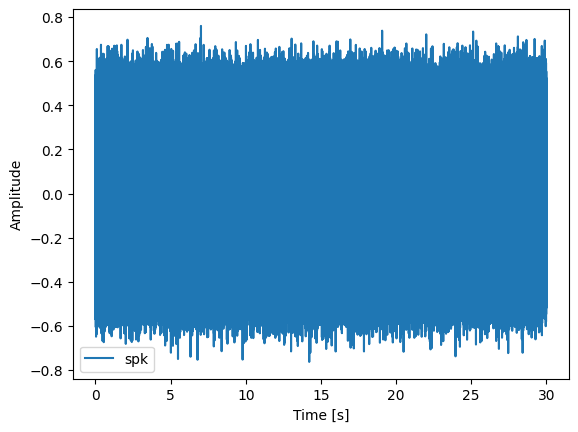

In [5]:
spkPath = os.path.join(dataFolder, 'White Noise.wav')
spkData, sample_rate = soundfile.read(spkPath) #返回
length = spkData.shape[0] / sample_rate
print(f"length = {length}s")
time = np.linspace(0., length, spkData.shape[0])
plt.plot(time, spkData, label="spk")
# plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

scipy.signal.spectrogram(x, fs=1.0, window=('tukey', 0.25), nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, mode='psd')
用连续的傅立叶变换计算频谱图。

频谱图可以用作可视化非平稳信号频率成分随时间变化的一种方式。

参数：
x：array_like
测量值的时间序列

fs：float, 可选参数
x时间序列的采样频率。默认为1.0。

window：str 或 tuple 或 array_like, 可选参数
希望使用的窗口。如果window是字符串或元组，则将其传递给get_window生成窗口值，默认情况下为DFT-even。参考get_window有关窗口和必需参数的列表。如果窗口是数组，它将直接用作窗口，并且其长度必须为nperseg。默认为形状参数为0.25的Tukey窗口。

nperseg：int, 可选参数
每个段的长度。默认为无，但是如果window是str或tuple，则设置为256，如果window是数组，则设置为窗口的长度。

noverlap：int, 可选参数
段之间重叠的点数。如果没有，noverlap = nperseg // 8。默认为没有。

nfft：int, 可选参数
如果需要零填充的FFT，则使用的FFT的长度。如果为None，则FFT长度为nperseg。默认为无。

detrend：str 或 function 或 False, 可选参数
指定如何使每个段趋势消失。如果detrend是一个字符串，它将作为类型参数传递给detrend函数。如果它是一个函数，它将采用一个段并返回一个去趋势的段。如果detrend是假，不进行趋势消除。默认为‘constant’。

return_onesided：bool, 可选参数
如果为True，则返回真实数据的one-sided频谱。如果为False，则返回two-sided频谱。默认为True，但是对于复杂数据，始终返回two-sided频谱。

scaling：{ ‘density’, ‘spectrum’ }, 可选参数
如果x的单位为V且fs的单位为fs，则在计算Sxx的单位为V ** 2 /Hz的功率谱密度(‘density’)和计算Sxx的单位为V ** 2的功率谱(‘spectrum’)之间进行选择。赫兹。默认为‘density’。

axis：int, 可选参数
计算频谱图的轴；默认值位于最后一个轴上(即axis=-1)。

mode：str, 可选参数
定义期望的返回值类型。选项为[‘psd’，‘complex’，‘magnitude’，‘angle’，‘phase’]。 ‘complex’等效于stft没有填充或边界扩展。 ‘magnitude’返回STFT的绝对大小。 ‘angle’和‘phase’分别返回带展开和不展开的STFT的复角。

返回值：
f：ndarray
采样频率数组。

t：ndarray
细分时间数组。

Sxx：ndarray
x的频谱图。默认情况下，Sxx的最后一个轴对应于段时间。

注意：
适当的重叠量将取决于窗口的选择和您的要求。与韦尔奇(Welch)的方法相反，在整个方法中对整个数据流求平均，在计算频谱图时可能希望使用较小的重叠(或根本不重叠)，以保持各个段之间的统计独立性。因此，默认窗口是Tukey窗口，该窗口的两端各有1/8的长度重叠。

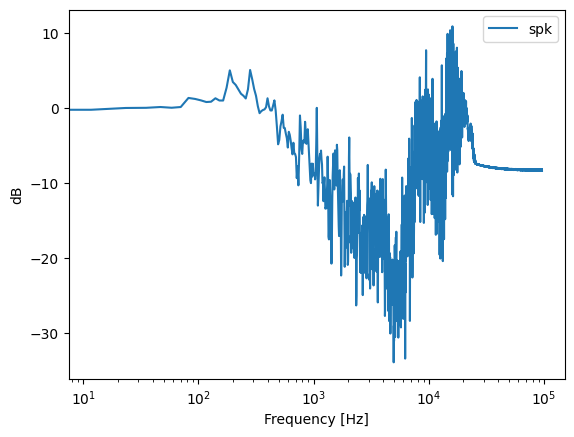

In [6]:
#https://vimsky.com/examples/usage/python-scipy.signal.spectrogram.html
#PP建模
from scipy import signal
f, _, sPPErr =  signal.spectrogram(PP_ErrData, fs=sample_rate, window=signal.get_window('hamming', 16384),
                                   nperseg=16384, noverlap=3/4*16384, mode='complex')
_, _, sPPRef =  signal.spectrogram(PP_RefData, fs=sample_rate, window=signal.get_window('hamming', 16384),
                                   nperseg=16384, noverlap=3/4*16384, mode='complex')
PPErr = 20*np.log10(np.mean(np.abs(sPPErr), 1))
PPRef = 20*np.log10(np.mean(np.abs(sPPRef), 1))
plt.plot(f, PPErr-PPRef, label="spk")
plt.legend()
plt.xscale('log')
plt.ylabel('dB')
plt.xlabel('Frequency [Hz]')
plt.show()

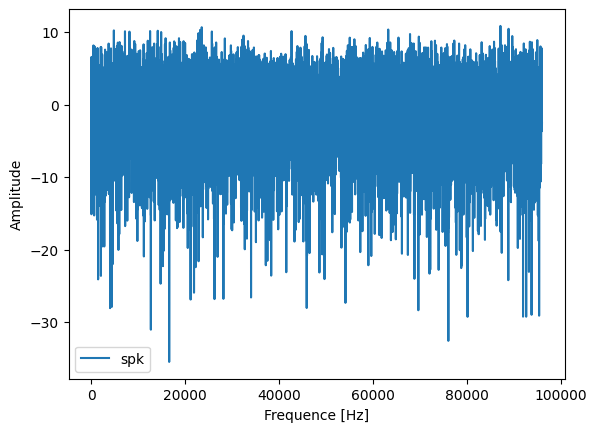

[0.00000000e+00 1.17187500e+01 2.34375000e+01 ... 9.59648438e+04
 9.59765625e+04 9.59882812e+04]
[-1.20159634+0.j         -0.2383474 +0.42474433j -1.08130913-0.5212724j
 ... -1.58014434+0.47507225j -0.47717545+0.44832424j
 -0.72362749-0.18284432j]
[ 1.59517195 -6.24853764  1.58650218 ...  4.34975831 -3.67855598
 -2.5409117 ]


In [7]:
from scipy.fftpack import fft, ifft, fftfreq
frameLength = 16384
numFrames = int(spkData.size//frameLength)
freq_sample = fftfreq(frameLength, 1/sample_rate)[:frameLength//2]

#分帧求FFT
spkFreq = fft(spkData[0:frameLength-1])[:frameLength//2]
for i in range(1, numFrames):    
    spkFreq += fft(spkData[i*frameLength:(i+1)*frameLength-1])[:frameLength//2]
spkFreq = spkFreq/numFrames

s = 20*np.log10(np.clip(np.abs(spkFreq), 1e-20, 1e100))
plt.plot(freq_sample, s, label="spk")
plt.legend()
plt.xlabel("Frequence [Hz]")
plt.ylabel("Amplitude")
plt.show()
print(freq_sample)
print(spkFreq)
print(s)

290
[1.22785568e-05 1.99079514e-05 2.87294388e-05 ... 4.30822372e-04
 3.02314758e-04 1.47104263e-04]
[ -64.07541689  -47.1512242   -52.96284455 ... -107.62975574 -108.98149383
 -107.99080014]


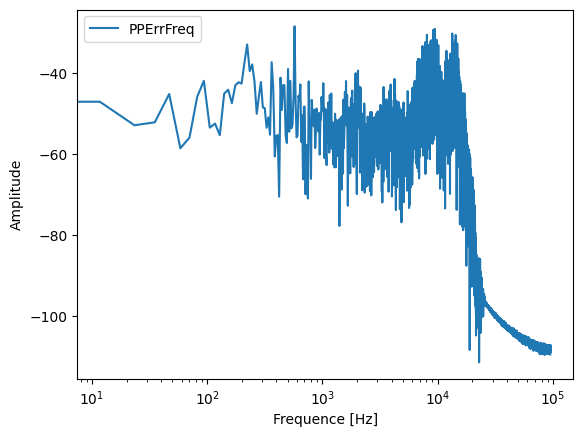

In [8]:
numFrames = int(PP_ErrData.size//frameLength)
freq_sample = fftfreq(frameLength, 1/sample_rate)[:frameLength//2]
print(numFrames)
#分帧求FFT
print(PP_ErrData)
PPErrFreq = fft(PP_ErrData[0:frameLength-1])[:frameLength//2]
for i in range(1, numFrames):    
    PPErrFreq += fft(PP_ErrData[i*frameLength:(i+1)*frameLength-1])[:frameLength//2]
PPErrFreq = PPErrFreq/numFrames

PPErr_S = 20*np.log10(np.clip(np.abs(PPErrFreq), 1e-20, 1e100))
print(PPErr_S)
plt.plot(freq_sample, PPErr_S, label="PPErrFreq")
plt.legend()
plt.xscale('log')
plt.xlabel("Frequence [Hz]")
plt.ylabel("Amplitude")
plt.show()

278
[-2.20537186e-05 -1.08480453e-05 -8.34465027e-07 ...  9.34839249e-04
  8.39233398e-04  6.34789467e-04]
[-57.92847237 -40.78312473 -42.02697988 ... -97.6611244  -97.90061927
 -97.58761567]


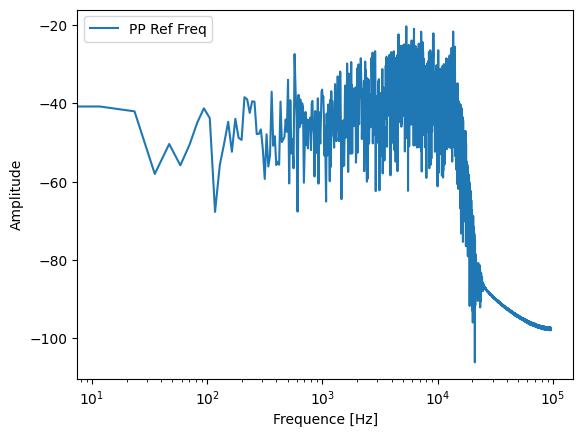

In [9]:
numFrames = int(PP_RefData.size//frameLength)
freq_sample = fftfreq(frameLength, 1/sample_rate)[:frameLength//2]
print(numFrames)
print(PP_RefData)
#分帧求FFT，然后求平均后的
PPRefFreq = fft(PP_RefData[0:frameLength-1])[:frameLength//2]
for i in range(1, numFrames):    
    PPRefFreq += fft(PP_RefData[i*frameLength:(i+1)*frameLength-1])[:frameLength//2]
PPRefFreq = PPRefFreq/numFrames

PPRef_S = 20*np.log10(np.clip(np.abs(PPRefFreq), 1e-20, 1e100))
print(PPRef_S)
plt.plot(freq_sample, PPRef_S, label="PP Ref Freq")
plt.legend()
plt.xscale('log')
plt.xlabel("Frequence [Hz]")
plt.ylabel("Amplitude")
plt.show()

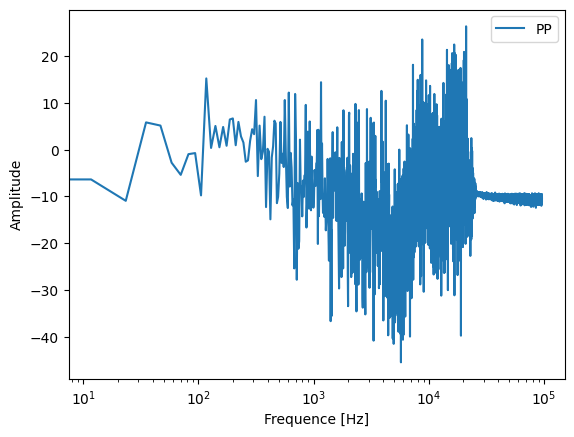

In [10]:
#先求每帧FFT，平均后再求幅频曲线的结果，曲线不够平滑
plt.plot(freq_sample, PPErr_S-PPRef_S, label="PP")
plt.legend()
plt.xscale('log')
plt.xlabel("Frequence [Hz]")
plt.ylabel("Amplitude")
plt.show()

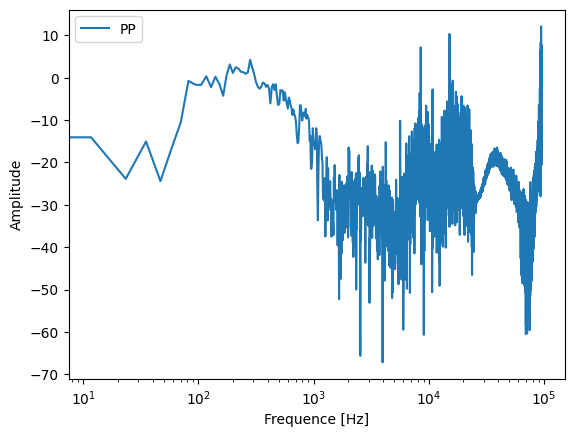

In [11]:
#先求每帧err/ref,再求幅频响应
numFrames_err = int(PP_ErrData.size//frameLength)
numFrames_ref = int(PP_RefData.size//frameLength)
numFrames = min(numFrames_err, numFrames_ref)
freq_sample = fftfreq(frameLength, 1/sample_rate)[:frameLength//2]

PPErrFreq = fft(PP_ErrData[0:frameLength-1])[:frameLength//2]
PPRefFreq = fft(PP_RefData[0:frameLength-1])[:frameLength//2]
PP = PPErrFreq/PPRefFreq
for i in range(1, numFrames):    
    PPErrFreq = fft(PP_ErrData[i*frameLength:(i+1)*frameLength-1])[:frameLength//2]
    PPRefFreq = fft(PP_RefData[i*frameLength:(i+1)*frameLength-1])[:frameLength//2]
    PP += PPErrFreq/PPRefFreq
PP = PP/numFrames
PP = 20*np.log10(np.clip(np.abs(PP), 1e-20, 1e100))
plt.plot(freq_sample, PP, label="PP")
plt.legend()
plt.xscale('log')
plt.xlabel("Frequence [Hz]")
plt.ylabel("Amplitude")
plt.show()

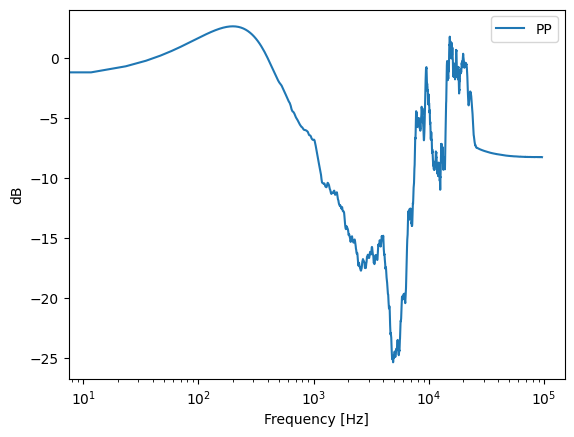

In [31]:
#PP建模
from scipy import signal
f, _, errPP =  signal.spectrogram(PP_ErrData, fs=sample_rate, window=signal.get_window('hamming', 16384),
                                   nperseg=16384, noverlap=3/4*16384, mode='complex')
_, _, refPP =  signal.spectrogram(PP_RefData, fs=sample_rate, window=signal.get_window('hamming', 16384),
                                   nperseg=16384, noverlap=3/4*16384, mode='complex')
PPErr = 20*np.log10(np.mean(np.abs(errPP), 1))
PPRef = 20*np.log10(np.mean(np.abs(refPP), 1))
PP = signal.savgol_filter(PPErr-PPRef, 73, 3)
plt.plot(f, PP, label="PP")
plt.legend()
plt.xscale('log')
plt.ylabel('dB')
plt.xlabel('Frequency [Hz]')
plt.show()

[0.00214409 0.00178637 0.00107219 ... 0.00274795 0.00127891 0.00010004]


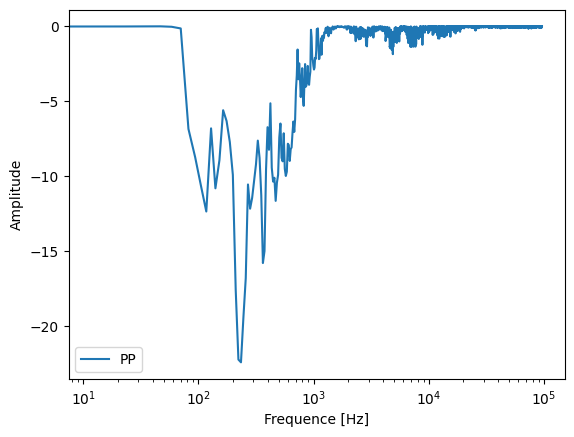

In [13]:
#求信号相干性
from scipy import signal
f, Cxx = signal.coherence(PP_ErrData[:numFrames*frameLength-1],PP_RefData[:numFrames*frameLength-1], sample_rate, window='hann', nperseg=frameLength)
print(Cxx)
Cxx = 20*np.log10(np.clip(np.abs(1-Cxx), 1e-20, 1e100))
plt.plot(f, Cxx, label="PP")
plt.legend()
plt.xscale('log')
plt.xlabel("Frequence [Hz]")
plt.ylabel("Amplitude")
plt.show()

## SP建模

[ 3.33856639e-06  2.74817762e-06  1.91606001e-06 ... -1.31567382e-06
 -6.09733130e-07  2.15531253e-08]


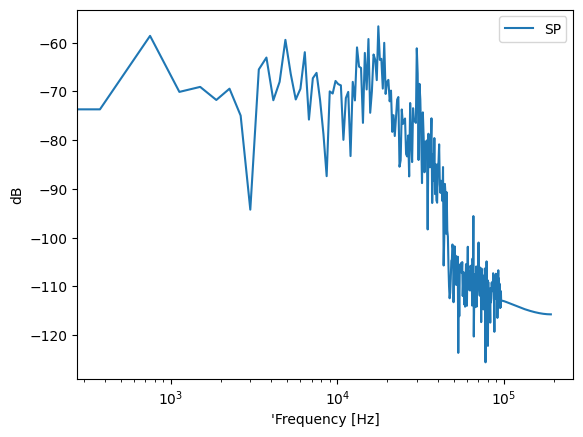

In [19]:
spkPath = os.path.join(dataFolder, 'White Noise.wav')
spkData, sample_rate = soundfile.read(spkPath) 

errPath = os.path.join(dataFolder, 'SP_err.wav')
errData, sample_rate = soundfile.read(errPath)

numFrames_err = int(errData.size//frameLength)
numFrames_spk = int(spkData.size//frameLength)
numFrames = min(numFrames_err, numFrames_spk)

spFreq = np.zeros(frameLength, dtype='complex') #FFT的频率精度为192000/16384
for i in range(1, numFrames):    
    errFreq = np.fft.fft(errData[i*frameLength:(i+1)*frameLength-1])[:frameLength//4] #16384/4=4096，只求4096阶的FIR
    spkFreq = np.fft.fft(spkData[i*frameLength:(i+1)*frameLength-1])[:frameLength//4]
    spFreq[:frameLength//4] += errFreq/spkFreq
spFreq = spFreq/numFrames
spFreq[0] = 0
spFreq[frameLength//2:frameLength-1] = np.flipud(np.conj(spFreq[1:frameLength//2])) #共轭对称
spModel = np.real(ifft(spFreq))[:frameLength//4] #反变换的实部即是脉冲响应，取4096阶
print(spModel)
w, h = signal.freqz(spModel, 1) #求FIR的频响
plt.plot(sample_rate*w/np.pi, 20*np.log10(np.abs(h)), label="SP")
plt.legend()
plt.xscale('log')
plt.xlabel("'Frequency [Hz]")
plt.ylabel("dB")
plt.show()

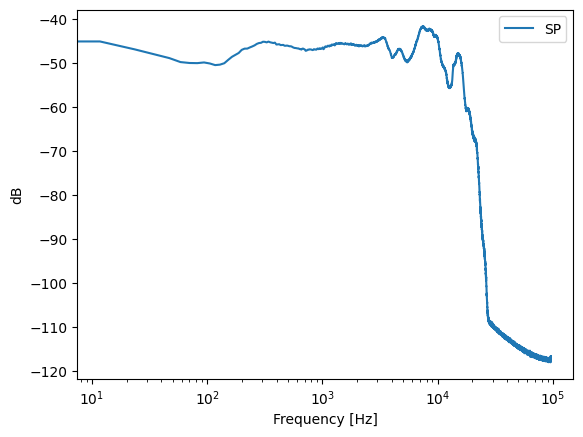

In [20]:
#SP建模
from scipy import signal
f, _, errSP =  signal.spectrogram(errData, fs=sample_rate, window=signal.get_window('hamming', 16384),
                                   nperseg=16384, noverlap=3/4*16384, mode='complex')
_, _, spkSP =  signal.spectrogram(spkData, fs=sample_rate, window=signal.get_window('hamming', 16384),
                                   nperseg=16384, noverlap=3/4*16384, mode='complex')
SPErr = 20*np.log10(np.mean(np.abs(errSP), 1))
SPSpk = 20*np.log10(np.mean(np.abs(spkSP), 1))
SP = SPErr-SPSpk
plt.plot(f, SPErr-SPSpk, label="SP")
plt.legend()
plt.xscale('log')
plt.ylabel('dB')
plt.xlabel('Frequency [Hz]')
plt.show()

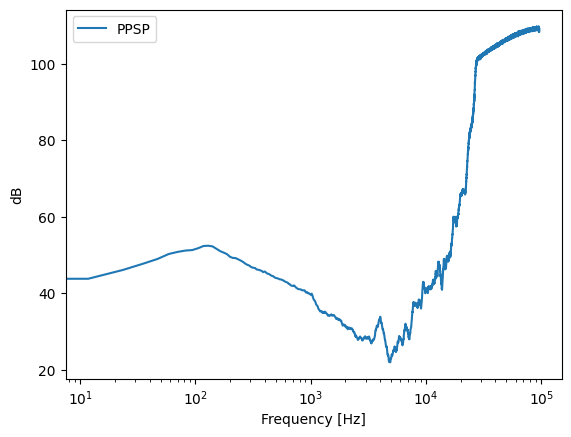

In [32]:
#PP/SP
PPSP = PP-SP
plt.plot(f, PPSP, label="PPSP")
plt.legend()
plt.xscale('log')
plt.ylabel('dB')
plt.xlabel('Frequency [Hz]')
plt.show()